In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd  #importing the dataset
data = pd.read_csv('/kaggle/input/student-mental-health/Student Mental health.csv')
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [2]:
data.shape # to get the amount of columns and rows

(101, 11)

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [6]:
data.isnull().sum()# to check for null values

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [7]:
col = data.columns # to check the column names 
col

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [8]:
data[col].nunique() # to check amount of unique values for each column 

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [9]:
data.describe() # to get the statistics summary of the data

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [10]:
data.duplicated().sum() # to get the count of duplicated values

0

<Axes: >

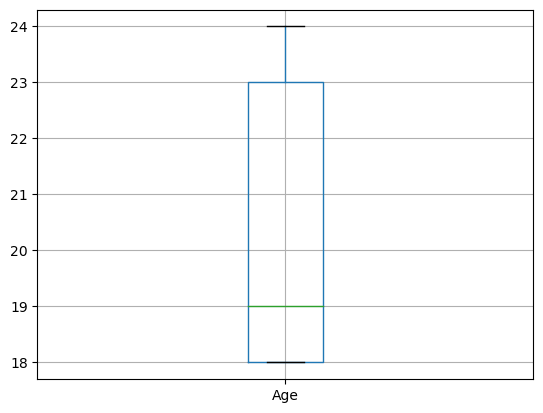

In [11]:
data[['Age']].boxplot() # plot a quick boxplot for Age 

In [12]:
data['What is your course?'].value_counts().head()

BCS                   18
Engineering           17
BIT                   10
Biomedical science     4
KOE                    4
Name: What is your course?, dtype: int64

In [13]:
data['Date'] = pd.to_datetime(data['Timestamp'])
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Day'] = data['Date'].dt.day

In [14]:
data = data.drop('Timestamp',axis=1)

In [15]:
data.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Date,Month,Year,Day
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,2020-08-07 12:02:00,8,2020,7
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,2020-08-07 12:04:00,8,2020,7
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,2020-08-07 12:05:00,8,2020,7
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,2020-08-07 12:06:00,8,2020,7
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,2020-08-07 12:13:00,8,2020,7


<Axes: >

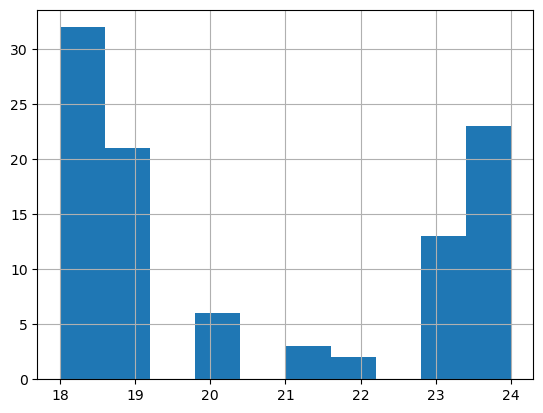

In [16]:
data['Age'].hist()

In [17]:
data['Your current year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [18]:
data['Your current year of Study'].value_counts() #identifying the inconsistencies in year of study 

year 1    41
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: Your current year of Study, dtype: int64

In [19]:
data['Your current year of Study'] = data['Your current year of Study'].replace('Year 1', 'year 1')
data['Your current year of Study'].value_counts()

year 1    43
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Name: Your current year of Study, dtype: int64

In [20]:
data['Your current year of Study'] = data['Your current year of Study'].replace('Year 2', 'year 2')
data['Your current year of Study'].value_counts()

year 1    43
year 2    26
Year 3    19
year 4     8
year 3     5
Name: Your current year of Study, dtype: int64

In [21]:
data['Your current year of Study'] = data['Your current year of Study'].replace('Year 3', 'year 3')
data['Your current year of Study'].value_counts()

year 1    43
year 2    26
year 3    24
year 4     8
Name: Your current year of Study, dtype: int64

In [22]:
cols = data.columns
data[cols].nunique()

Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       4
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
Date                                            92
Month                                            3
Year                                             1
Day                                              3
dtype: int64

In [23]:
data['What is your CGPA?'].value_counts() #identifying the inconsistencies in CGPA column

3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: What is your CGPA?, dtype: int64

In [24]:
data['What is your CGPA?'] = data['What is your CGPA?'].replace('3.50 - 4.00 ', '3.50 - 4.00')
data['What is your CGPA?'].value_counts() #correcting th e inconsitency 

3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: What is your CGPA?, dtype: int64

In [25]:
data['Month'].value_counts()

8    73
7    23
9     5
Name: Month, dtype: int64

In [26]:
data['Choose your gender'].value_counts()

Female    75
Male      26
Name: Choose your gender, dtype: int64

(array([75.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 26.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

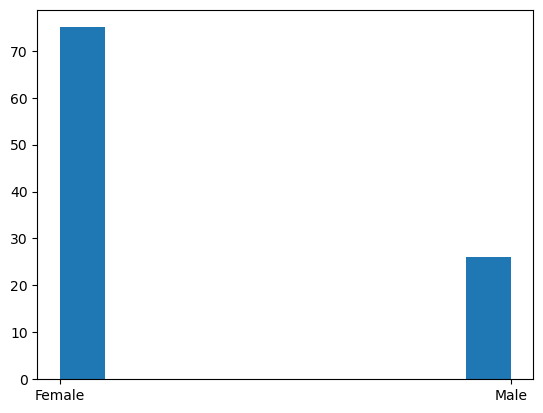

In [27]:
import  matplotlib.pyplot as plt
plt.hist(data['Choose your gender'])

<BarContainer object of 101 artists>

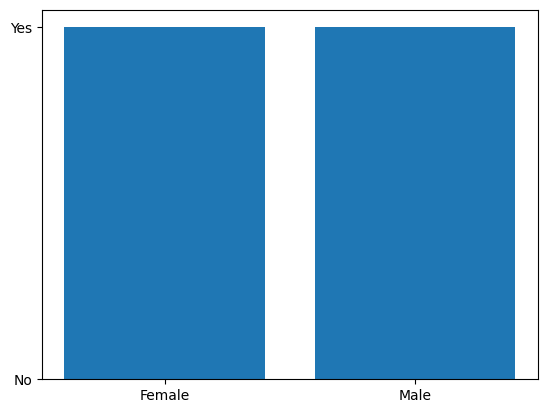

In [28]:
plt.bar(data['Choose your gender'], data['Do you have Anxiety?'])

<Axes: xlabel='What is your CGPA?'>

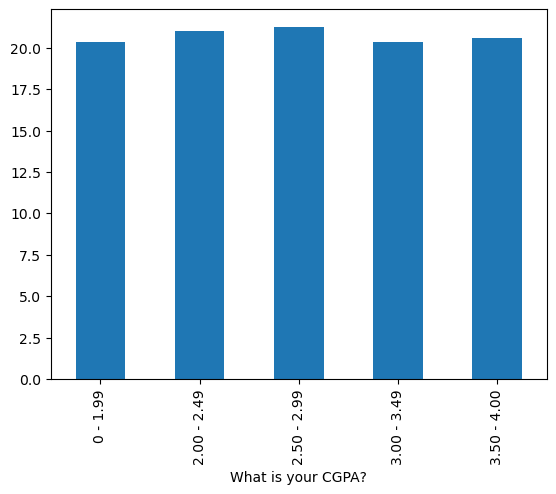

In [29]:
data.groupby('What is your CGPA?')['Age'].mean().plot.bar()

In [30]:
gender = data.groupby(['Choose your gender']).size().reset_index(name='count')
gender

,Choose your gender,count
0,Female,75
1,Male,26


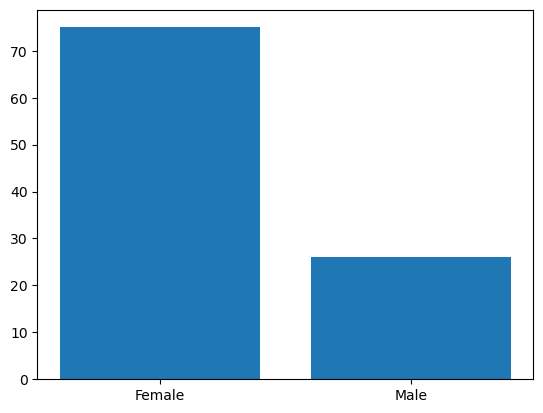

In [31]:
plt.bar(gender['Choose your gender'],gender['count'])
plt.show()

In [32]:
Depression = data.groupby(['Do you have Depression?']).size().reset_index(name='count')
Depression


,Do you have Depression?,count
0,No,66
1,Yes,35


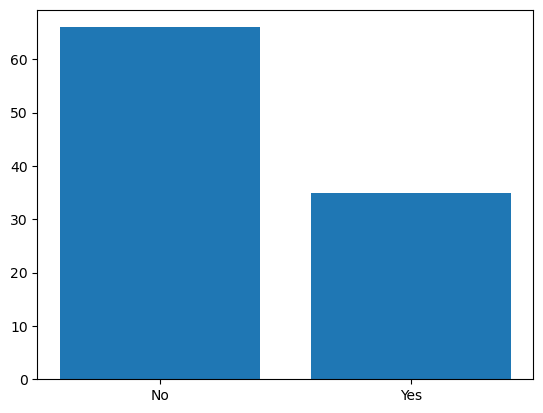

In [33]:
plt.bar(Depression['Do you have Depression?'], Depression['count'])
plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


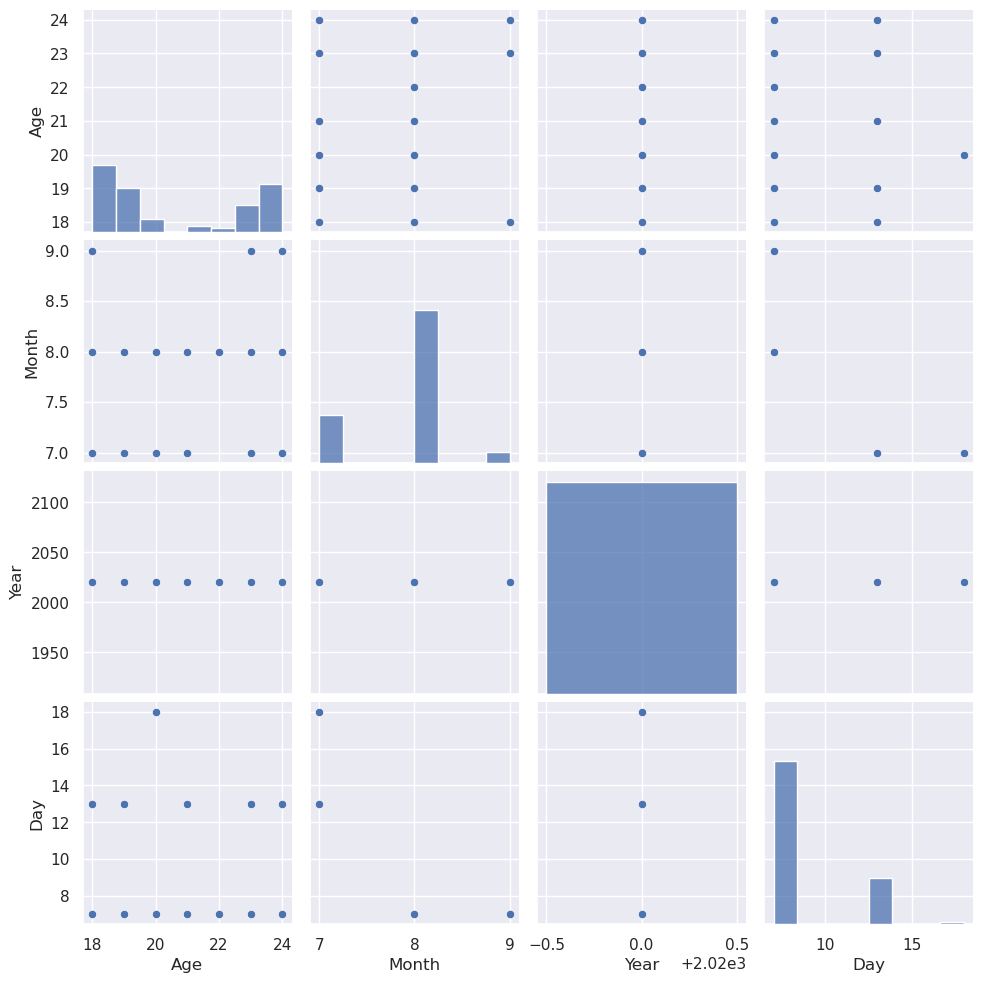

In [34]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(data)

In [35]:
Anxiety = data.groupby(['Do you have Anxiety?']).size().reset_index(name='count')
Anxiety

,Do you have Anxiety?,count
0,No,67
1,Yes,34


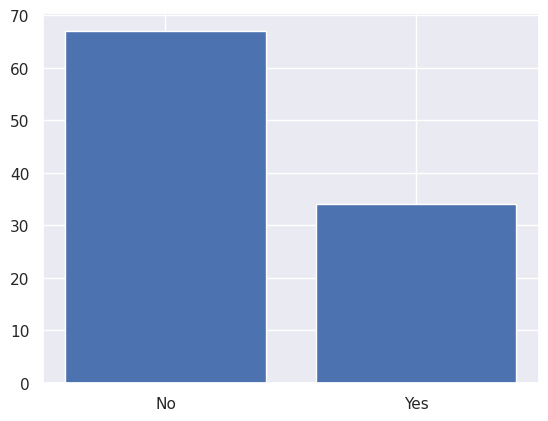

In [36]:
plt.bar(Anxiety['Do you have Anxiety?'], Anxiety['count'])
plt.show()

In [49]:
data['What is your course?'].value_counts().head(7)

BCS                   18
Engineering           17
BIT                   10
Biomedical science     4
KOE                    4
BENL                   2
Laws                   2
Name: What is your course?, dtype: int64

(array([2., 0., 1., 0., 0., 1., 0., 1., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

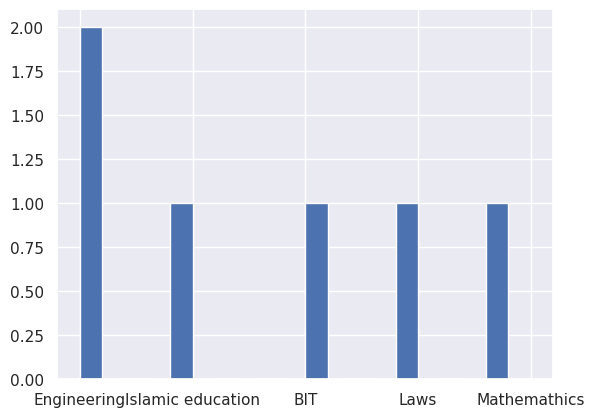

In [53]:
plt.hist(data['What is your course?'].head(6),width =0.2)

(array([85.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

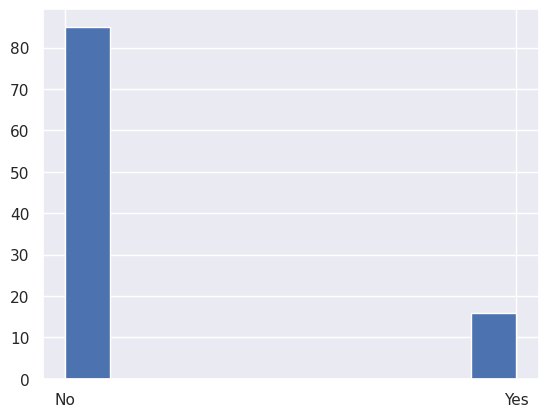

In [38]:
plt.hist( data['Marital status'])

In [39]:
Panic_attack = data.groupby(['Do you have Panic attack?']).size().reset_index(name='count')
Panic_attack

,Do you have Panic attack?,count
0,No,68
1,Yes,33


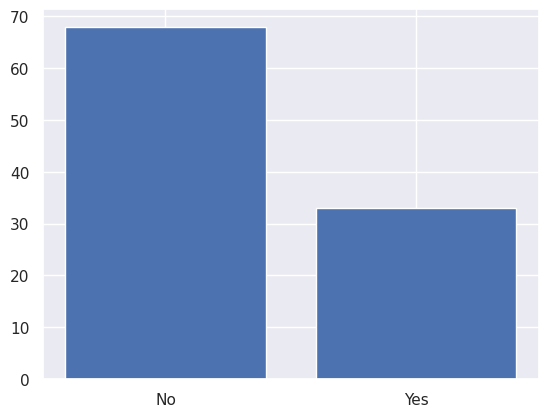

In [40]:
plt.bar(Panic_attack['Do you have Panic attack?'], Panic_attack['count'])
plt.show()

In [41]:
Treatment = data.groupby(['Did you seek any specialist for a treatment?']).size().reset_index(name='count')
Treatment

,Did you seek any specialist for a treatment?,count
0,No,95
1,Yes,6


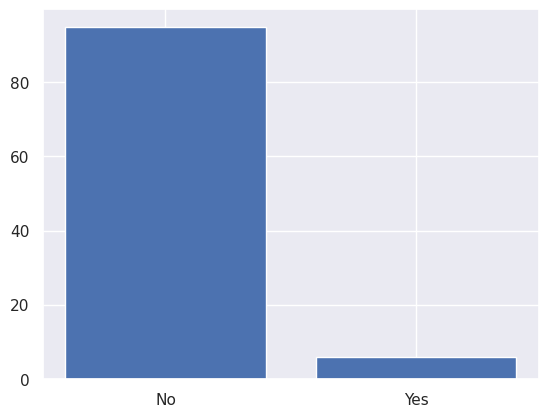

In [42]:
plt.bar(Treatment['Did you seek any specialist for a treatment?'], Treatment ['count'])
plt.show()

In [43]:
study_year = data.groupby(['Your current year of Study']).size().reset_index(name='count')
study_year

,Your current year of Study,count
0,year 1,43
1,year 2,26
2,year 3,24
3,year 4,8


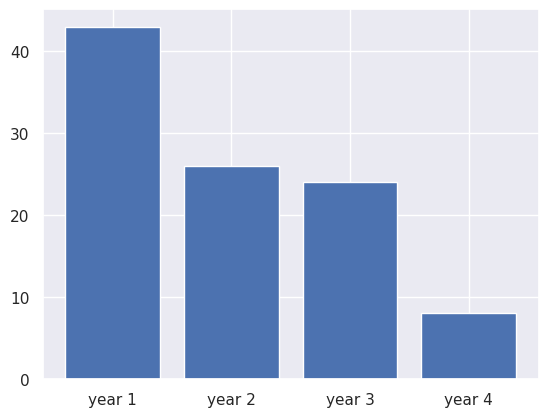

In [44]:
plt.bar(study_year['Your current year of Study'], study_year['count'])
plt.show()

## Major Findings:
 - The respondets were mostly female
 - The respondents Were mostly in year 1
 - Panic attack(68%:NO, 32%:Yes)
 - Depression(65%:NO, 35%:Yes)
 - Anxiety(67%:NO, 33%:Yes)
 - Seek specialist for treatment (95%:NO, 5%:Yes)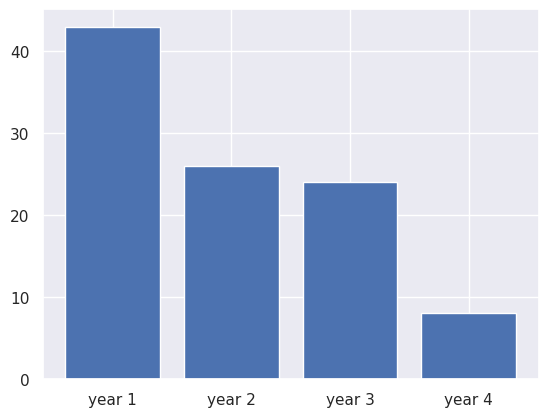